In [1]:
# %load ~/my_imports.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale


Kelly = ['#af2337', '#ecc342', '#2967a0', '#2f3c28', '#96b437',
         '#da93ab', '#e58932', '#80598f', '#7e331f', '#3b855a',
         '#c0b286', '#a9c9ed', '#ec977f', '#848482', '#604628',
         '#d26034', '#a64c6b', '#dbd245', '#eba83b', '#5d5092',
         '#222222', '#f2f3f4']

GreenArmytage = ['#e3a7fa', '#3575d5', '#8d4418', '#440b59', '#191919', '#285a35',
                 '#6aca5b', '#f6cda0', '#808080', '#b1fcbb', '#8c7c26', '#a8ca3f',
                 '#af2785', '#13347b', '#51a12f', '#f1acbb', '#4b651a', '#e73329',
                 '#8deef0', '#48978f', '#e7fd7d', '#0c1ff5', '#8a1a11', '#fffe92',
                 '#f9e14c', '#e95d2a']

mpl.rcParams['axes.prop_cycle'] = plt.cycler(color=Kelly)
mpl.rcParams['axes.titlesize'] = 19
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['legend.markerscale'] = 2
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

sc.set_figure_params(transparent=True, dpi=90)

In [2]:
sample_info = pd.read_csv('mCortex_main/analysis_pipe_out/Supplementary_Table_1.csv', index_col=0)

In [3]:
pt = pd.read_csv('mCortex_main/analysis_pipe_out/mCortex_all_OPC_to_Oligo_peudotime_information.csv', index_col=0)
pt.head(2)

,component1,component2,Pseudotime,State
TCGTTCGAGCTACGTT-1,-3.960154,-0.700062,0.281873,1
AAGATAGAGCTGAGGT-1,-3.979295,-0.609999,0.313585,1


In [4]:
sample_info.query('RNA_Cluster == "R14" | RNA_Cluster == "R20"').shape

(247, 47)

In [5]:
pt.shape

(247, 4)

In [6]:
pt = pd.concat([pt, sample_info], axis=1, join='inner')
pt.columns

Index(['component1', 'component2', 'Pseudotime', 'State', 'batch',
       'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_ATAC',
       'nFeature_ATAC', 'TSS.enrichment', 'TSS.percentile',
       'nucleosome_signal', 'nucleosome_percentile', 'blacklist_fraction',
       'Group', 'RNA_Cluster', 'seurat_clusters', 'ATAC_Cluster',
       'predicted.id', 'prediction.score.Vip', 'prediction.score.Lamp5',
       'prediction.score.Sst', 'prediction.score.Sncg',
       'prediction.score.Serpinf1', 'prediction.score.Pvalb',
       'prediction.score.Endo', 'prediction.score.Peri',
       'prediction.score.L6.CT', 'prediction.score.L6b',
       'prediction.score.L6.IT', 'prediction.score.L2.3.IT',
       'prediction.score.CR', 'prediction.score.L5.PT', 'prediction.score.NP',
       'prediction.score.L4', 'prediction.score.L5.IT',
       'prediction.score.Oligo', 'prediction.score.Meis2',
       'prediction.score.Astro', 'prediction.score.Macrophage',
       'prediction.score.VLMC', 'predictio

In [7]:
pt['Annotation']

TCGTTCGAGCTACGTT-1      R20 OPC
AAGATAGAGCTGAGGT-1      R20 OPC
TGATTTCTCGTTCCGT-1      R20 OPC
ACAATCGGTGGGTAGT-1      R20 OPC
TCCAGAAAGAGGAAGT-1      R20 OPC
                        ...    
CAACGGCTCCATCGAA-2      R20 OPC
AACAGTCGTAATGCAA-2      R20 OPC
TAGGTCACAGAGCCAA-2      R20 OPC
GTTGGGCGTCAAACAA-2    R21 Oligo
TGACTCCCATCCCAAA-2      R20 OPC
Name: Annotation, Length: 247, dtype: object

In [8]:
adata = sc.read_csv('mCortex_main/analysis_pipe_out/mCortex_all_expression_matrix.csv.gz').T
adata = adata[pt.index, :].copy()

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata, max_value=10)

In [9]:
pt['Pdgfra'] = adata[:, ['Pdgfra']].X.flatten()
pt['Mal'] = adata[:, ['Mal']].X.flatten()
pt['Mbp'] = adata[:, ['Mbp']].X.flatten()
pt['Olig1'] = adata[:, ['Olig1']].X.flatten()
pt['State_str'] = pt['State'].astype(str)

In [10]:
sns.set_style('ticks')

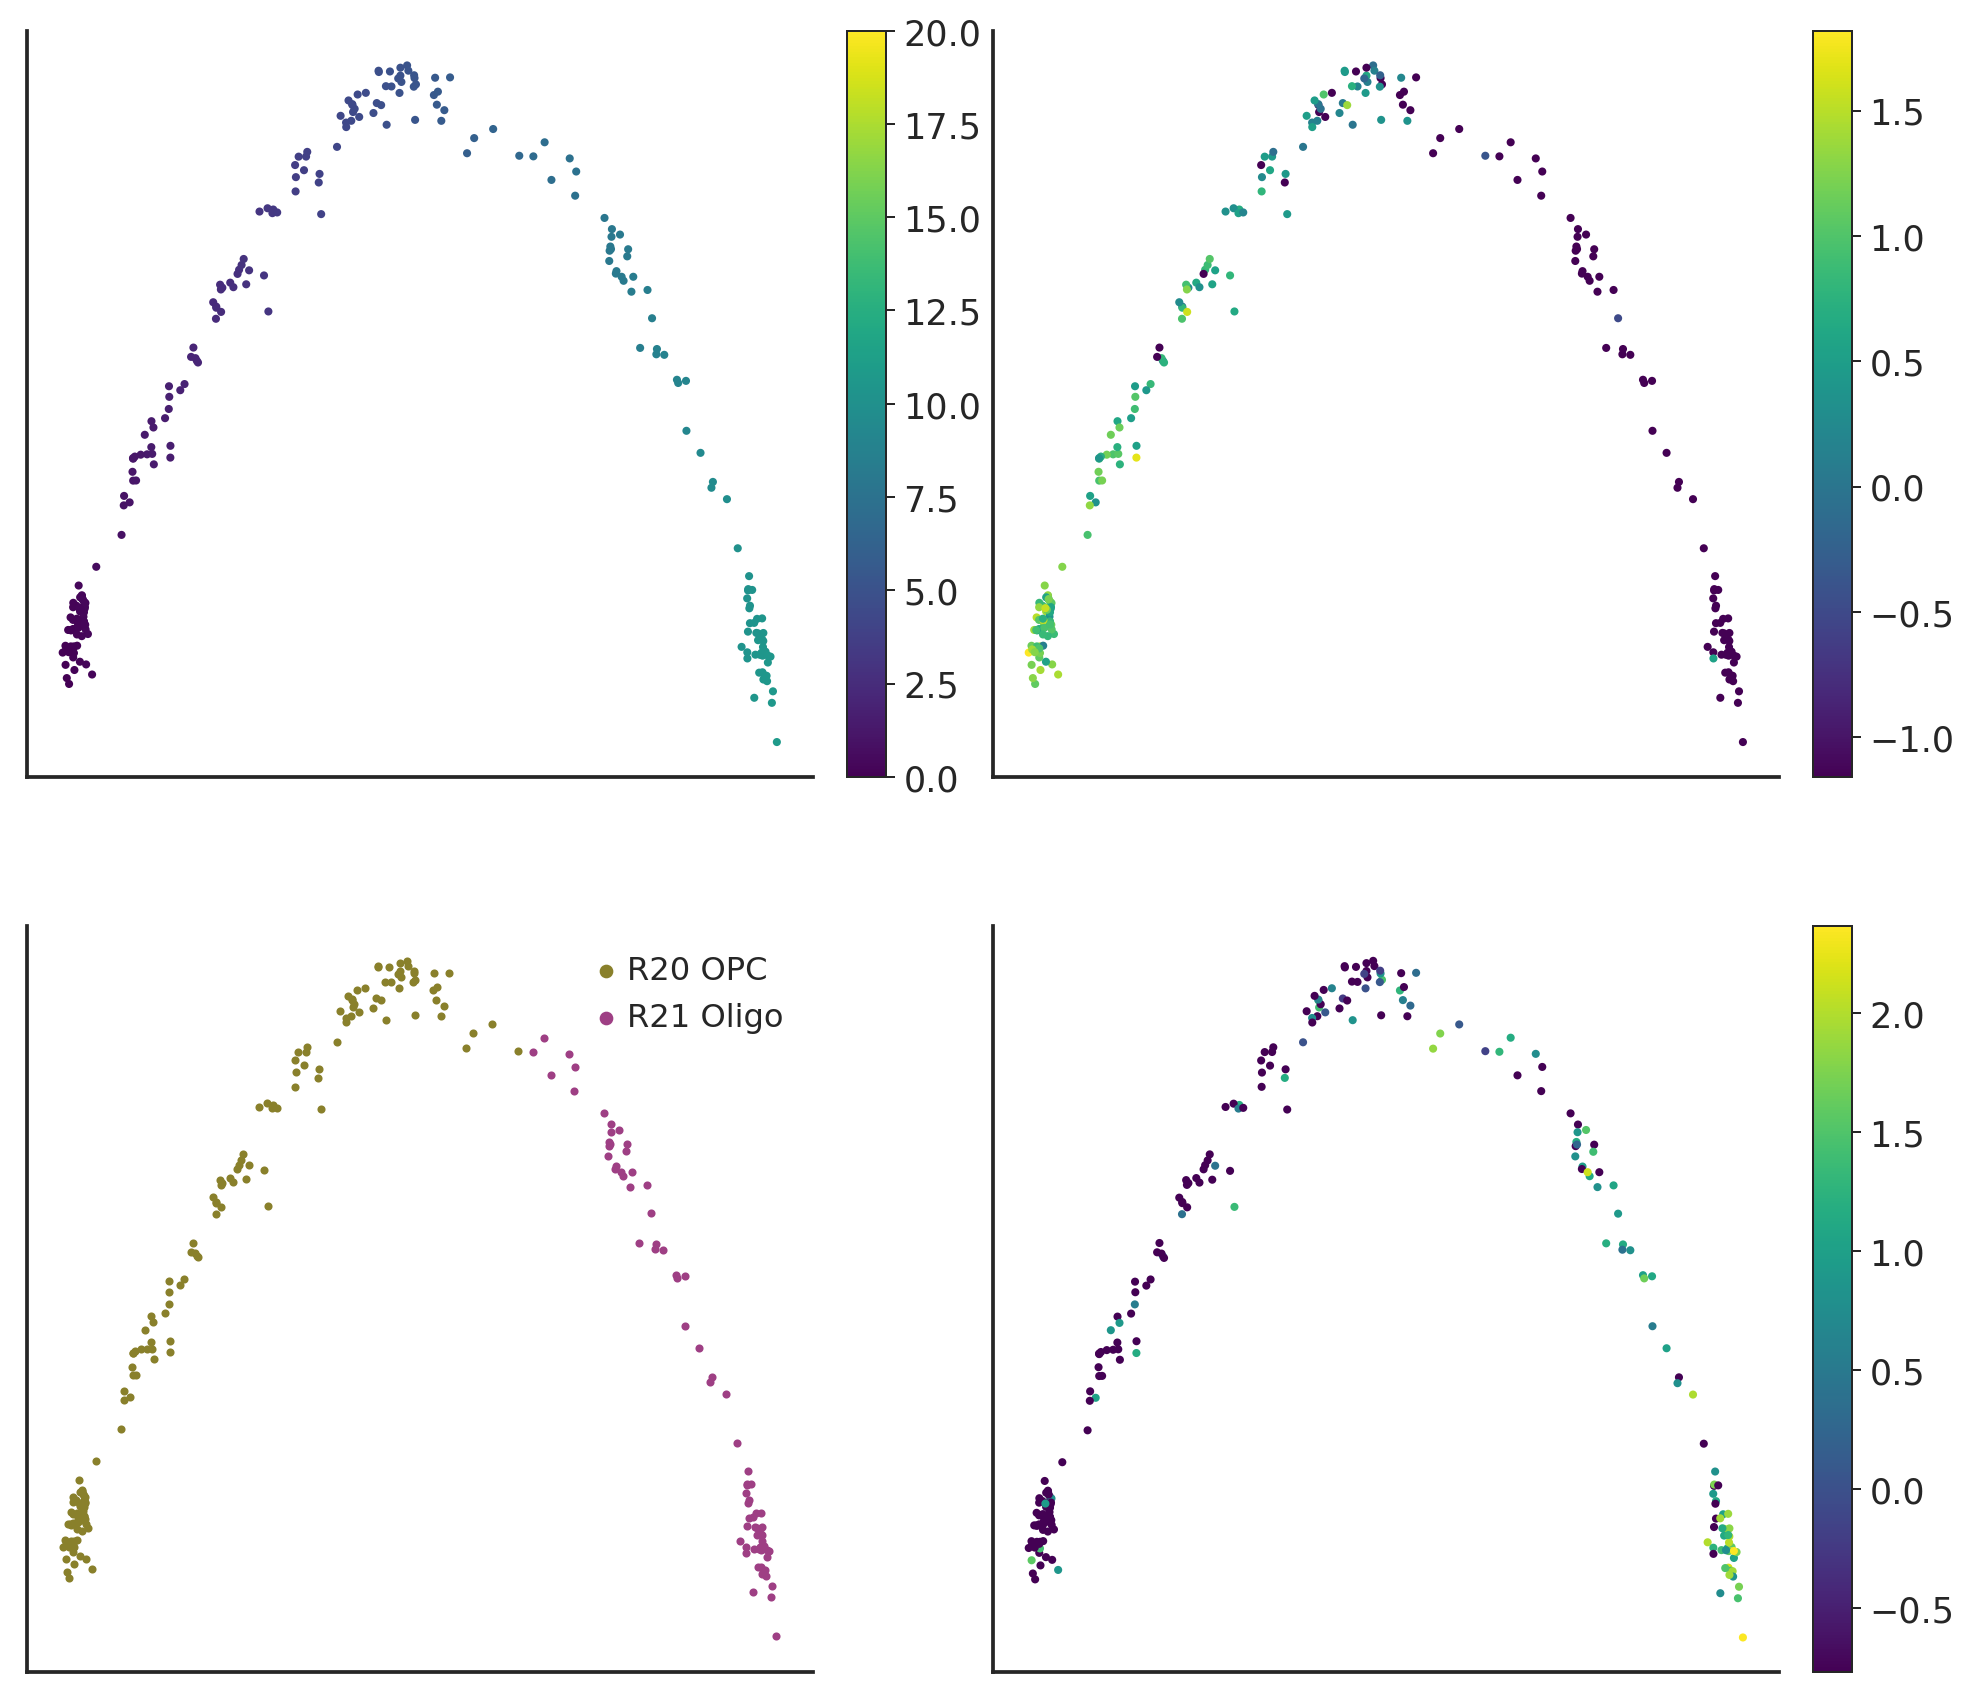

In [11]:
fig, axs = plt.subplots(figsize=(13,12), nrows=2, ncols=5, gridspec_kw={'width_ratios' : [20,1,1,20,1], 'wspace' : 0.1})
ax1, ax2 = axs

c1 = ax1[0].scatter(pt['component1'], pt['component2'], s=5, c=pt['Pseudotime'], cmap='viridis', vmin=0, vmax=20)
ax1[0].set_xticks([])
ax1[0].set_yticks([])
plt.colorbar(c1, cax=ax1[1])

c2 = ax1[3].scatter(pt['component1'], pt['component2'], s=5, c=pt['Pdgfra'], cmap='viridis')
ax1[3].set_xticks([])
ax1[3].set_yticks([])
plt.colorbar(c2, cax=ax1[4])

ax2[0].scatter(pt.query('RNA_Cluster == "R14"')['component1'], pt.query('RNA_Cluster == "R14"')['component2'], s=5, c='#89802b', label='R20 OPC')
ax2[0].scatter(pt.query('RNA_Cluster == "R20"')['component1'], pt.query('RNA_Cluster == "R20"')['component2'], s=5, c='#9e3f84', label='R21 Oligo')
ax2[0].legend(frameon=False, loc='upper right')
ax2[0].set_xticks([])
ax2[0].set_yticks([])

c3 = ax2[3].scatter(pt['component1'], pt['component2'], s=5, c=pt['Mbp'], cmap='viridis')
ax2[3].set_xticks([])
ax2[3].set_yticks([])
plt.colorbar(c3, cax=ax2[4])

for p in ['top', 'right']:
    ax1[0].spines[p].set_visible(False)
    ax2[0].spines[p].set_visible(False)
    ax1[3].spines[p].set_visible(False)
    ax2[3].spines[p].set_visible(False)
    
for p in ['left', 'bottom']:
    ax1[0].spines[p].set_linewidth(1.5)
    ax2[0].spines[p].set_linewidth(1.5)
    ax1[3].spines[p].set_linewidth(1.5)
    ax2[3].spines[p].set_linewidth(1.5)

ax1[2].axis('off')
ax2[1].axis('off')
ax2[2].axis('off')
plt.show()

In [12]:
rna = pd.read_csv('mCortex_main/analysis_pipe_out/mCortex_all_OPC_to_Oligo_cor_gene_expression_pseudotime.csv', index_col=0)
atac = pd.read_csv('mCortex_main/analysis_pipe_out/mCortex_all_OPC_to_Oligo_cor_gene_activity_score_pseudotime.csv', index_col=0)
print(rna.shape, atac.shape)

(100, 100) (100, 100)


In [13]:
# scale the data

z_rna = rna.div(rna.max(1), axis='index')
z_atac = atac.div(atac.max(1), axis='index')

In [14]:
combined = pd.concat([z_rna, z_atac], axis = 1)
combined.shape

(100, 200)

In [15]:
combined.columns = ['bin_%s' % i for i in range(200)]
combined.head(2)

,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_190,bin_191,bin_192,bin_193,bin_194,bin_195,bin_196,bin_197,bin_198,bin_199
Serpine2,1.0,0.974927,0.950410,0.926369,0.902731,0.879429,0.856404,0.833602,0.810977,0.788487,...,0.108463,0.103376,0.098528,0.093907,0.089502,0.085304,0.081304,0.07749,0.073856,0.070392
Neu4,1.0,0.961166,0.923903,0.888205,0.854060,0.821450,0.790352,0.760741,0.732587,0.705857,...,0.006020,0.005434,0.004905,0.004428,0.003997,0.003608,0.003257,0.00294,0.002654,0.002396


/home/xichen/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


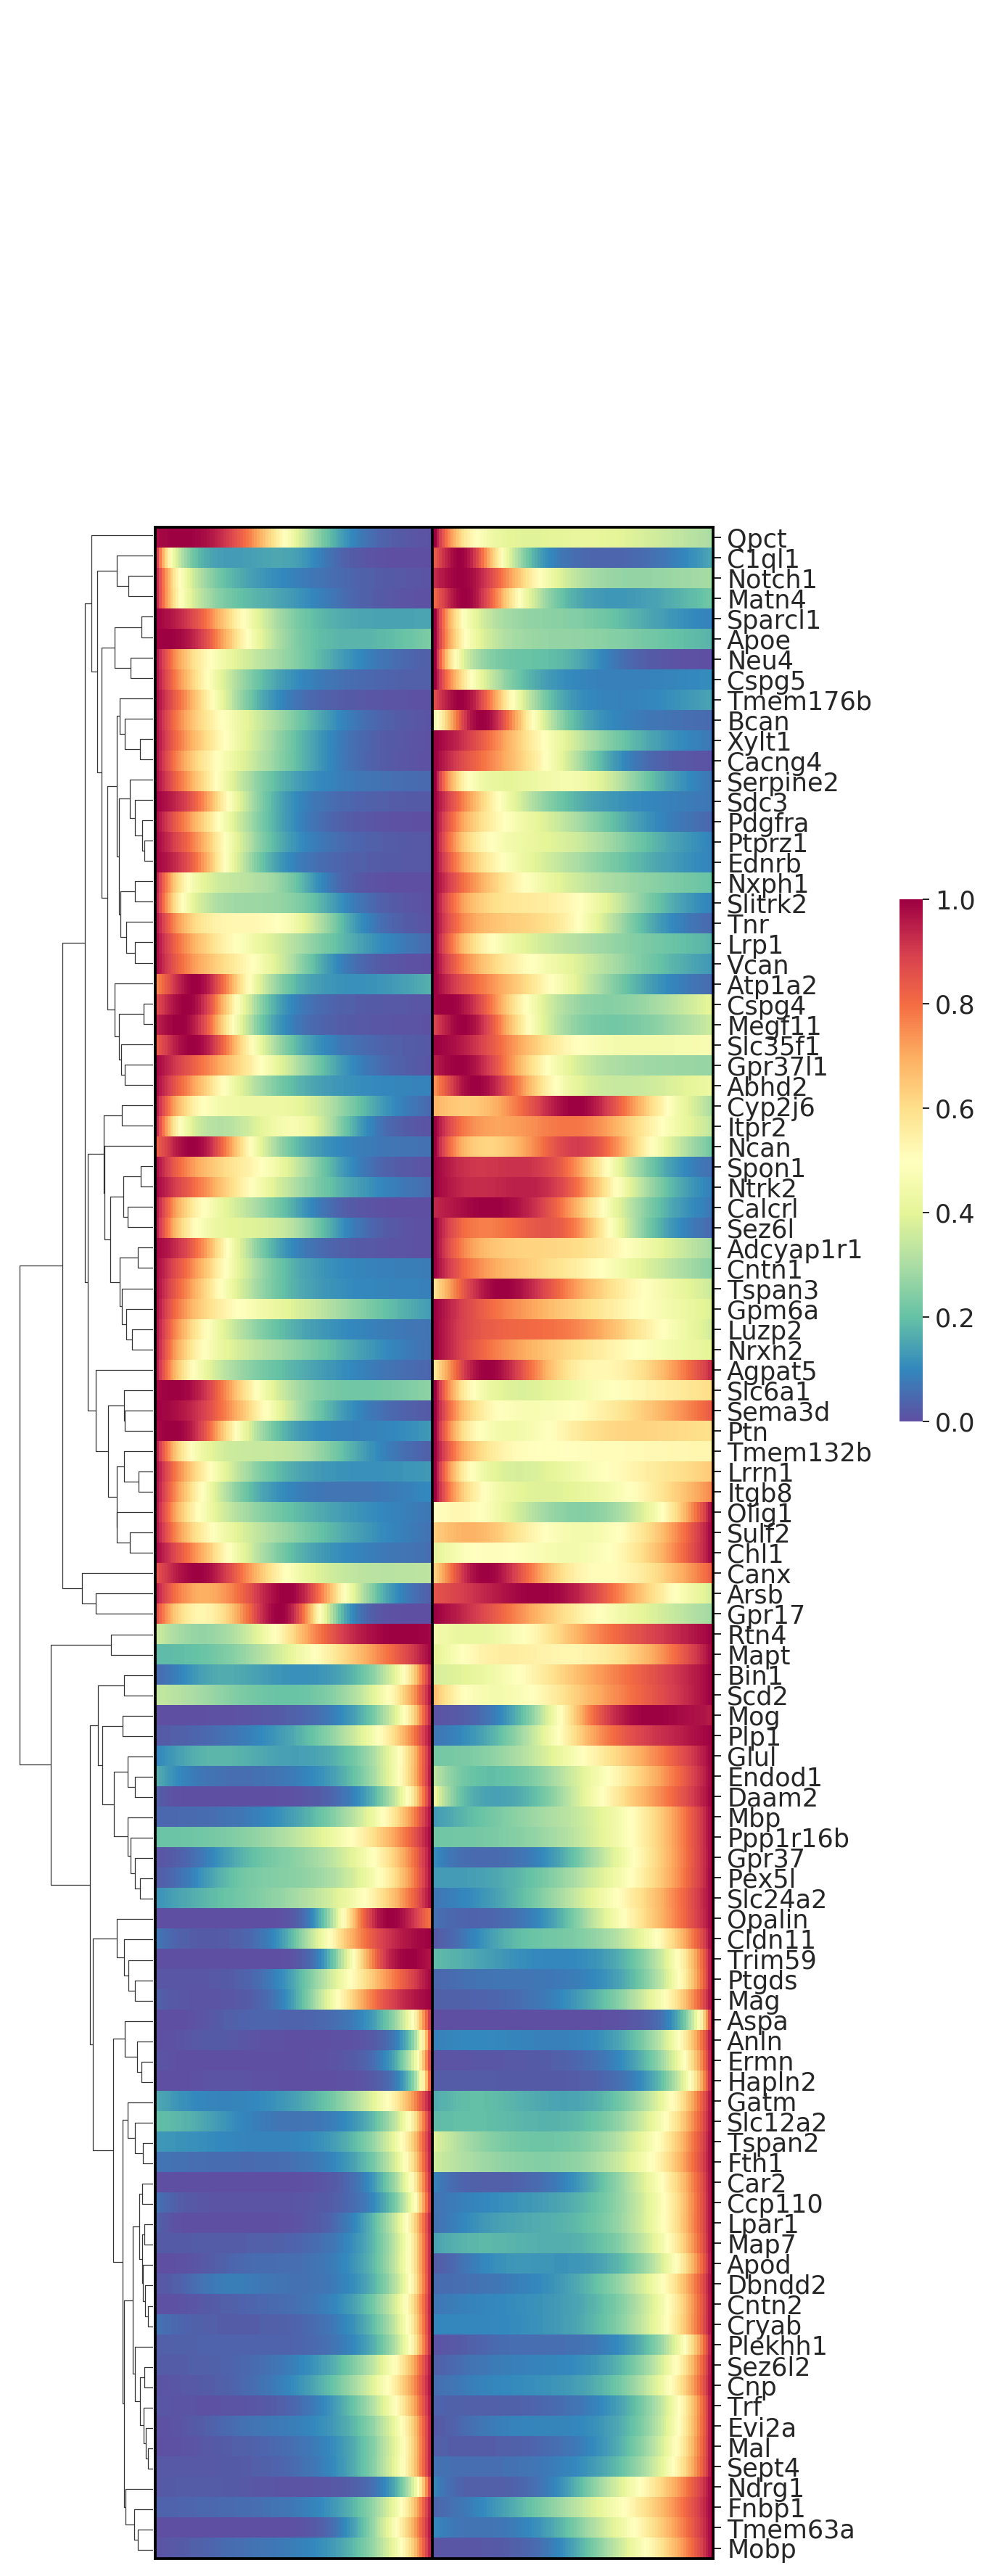

In [16]:
g = sns.clustermap(combined, row_cluster=True, col_cluster=False, cmap='Spectral_r', figsize=(7,20),
                   cbar_pos=(1, 0.45, 0.025, 0.2), yticklabels=True, xticklabels=False, vmin=0, vmax=1)
g.ax_heatmap.vlines(99.5, 0, 100, color='k', lw=1.5)
g.ax_heatmap.vlines(0.5, 0, 100, color='k', lw=1.5)
g.ax_heatmap.vlines(199.5, 0, 100, color='k', lw=1.5)

g.ax_heatmap.hlines(0, 0, 200, color='k', lw=1.5)
g.ax_heatmap.hlines(100, 0, 200, color='k', lw=1.5)

g.ax_heatmap.set_ylim(100.1, -0.1)

plt.show()

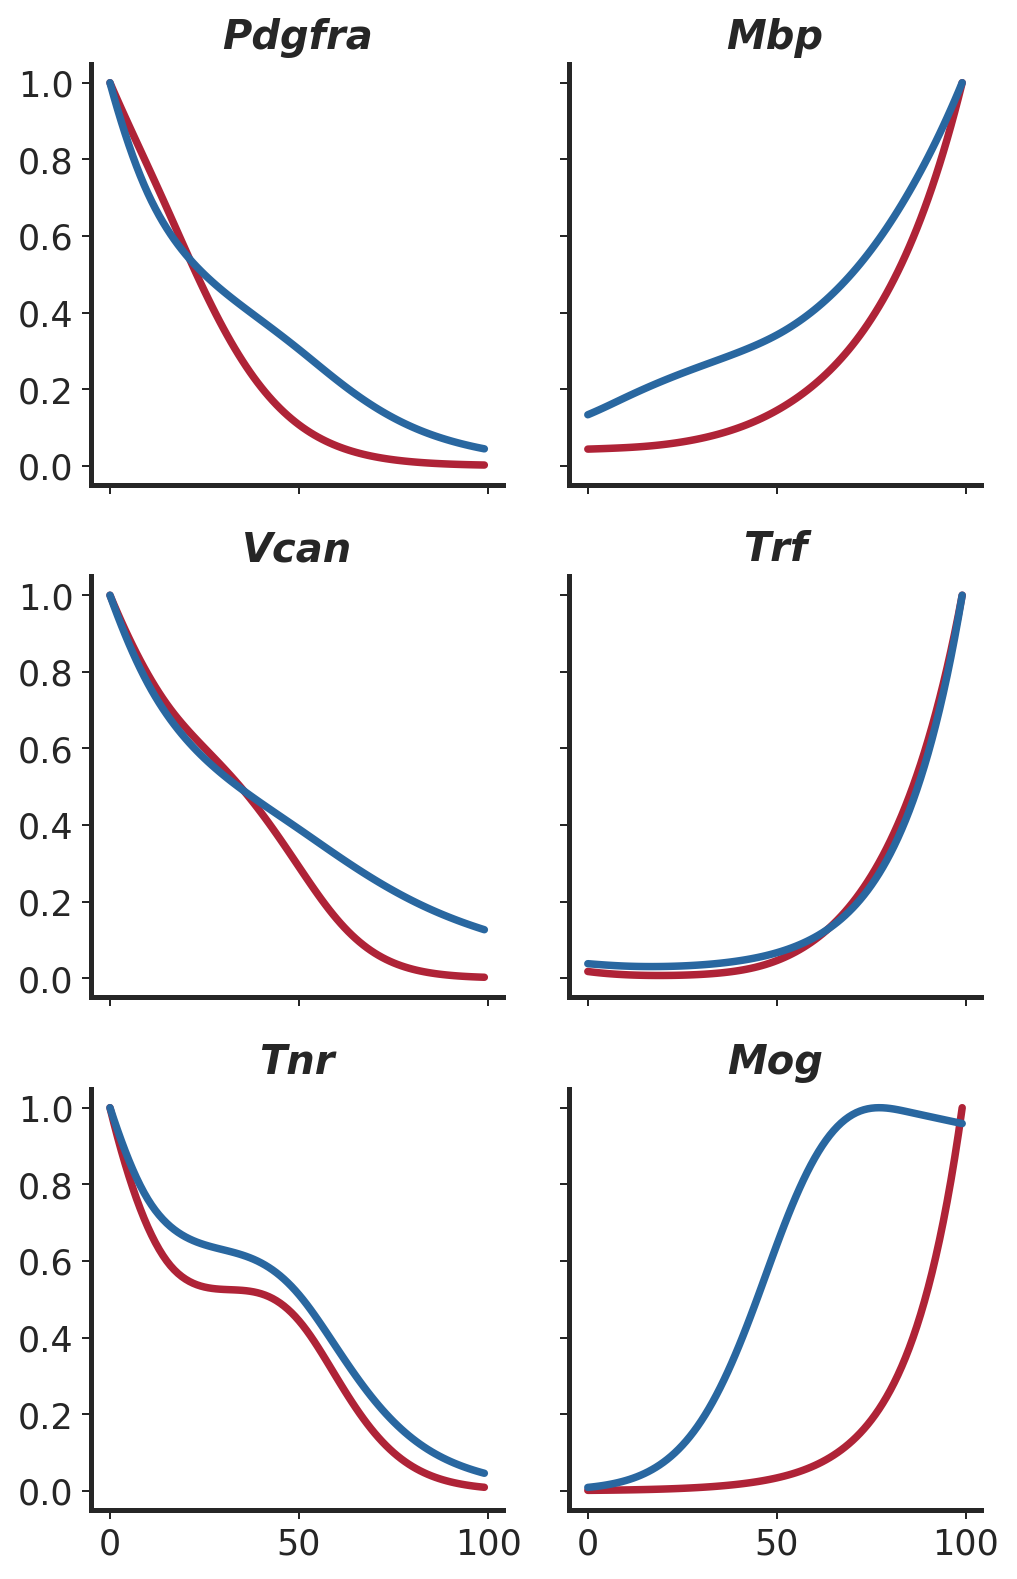

In [17]:
fig, axs = plt.subplots(figsize=(6,9), ncols=2, nrows=3, sharex=True, sharey=True)
ax = axs.flatten()

for g,a in zip(['Pdgfra', 'Mbp', 'Vcan', 'Trf', 'Tnr', 'Mog'], ax):
    a.plot(range(100), combined.loc[g, 'bin_0':'bin_99'], color='#af2337', lw=3)
    a.plot(range(100), combined.loc[g, 'bin_100':'bin_199'], color='#2967a0', lw=3)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['left'].set_linewidth(2)
    a.spines['bottom'].set_linewidth(2)
    a.set_title(g, style='italic', weight='bold', fontsize=16)

fig.tight_layout()
plt.show()